# Notebook Para el Análisis Exploratorio de Datos (EDA)

In [24]:
# importación de libnerias
#import re
#import sketch
import numpy as np 
import pandas as pd 
#import pandas_alive
from matplotlib import cm 
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas as gpd
#import geojson
#import folium
#from folium.plugins import HeatMap
#from summarytools import dfSummary
from datetime import datetime
from PIL import Image
import wordcloud
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", message="Glyph 146 missing from current font.")

In [228]:
# Asignamos la ruta o ubicación deldataset a utilizar
ruta_dataset = r'../datasets/homicidios.xlsx'

# Preparación de datos de homicidios_hechos

In [229]:
# Cargamos la hoja de homicidios_hecho
# La variable ruta_dataset contiene la ruta del archivo excel
homicidios_hechos = pd.read_excel(ruta_dataset, sheet_name="HECHOS")

In [230]:
# Verificamos la lectura del archivo y observamos las columnas del dataframe
homicidios_hechos.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


### Datos fueron cargados sin problema

In [231]:
# Traducción de las columnas
columnas_hechos = ["codigo_siniestro","cantidad_victimas","fecha","anio","mes","dia","hora","franja_horaria","lugar_hecho",
                   "tipo_calle","calle","altura_siniestro","cruce_siniestro","direccion_siniestro","comuna", 
                   "geocodificacion_caba","longitud","latitud","tipo_participantes","tipo_victima","tipo_acusado"]
homicidios_hechos.columns = columnas_hechos

### Traducimos los nombres de campos para un mejor entendimiento de su significado

In [232]:
# Observamos el nombre de las columnas
homicidios_hechos.tail(2)

,codigo_siniestro,cantidad_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar_hecho,tipo_calle,...,altura_siniestro,cruce_siniestro,direccion_siniestro,comuna,geocodificacion_caba,longitud,latitud,tipo_participantes,tipo_victima,tipo_acusado
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS
695,2021-0097,1,2021-11-18,2021,11,18,06:10:00,6,PADRE CARLOS MUJICA 709,CALLE,...,709.0,NaN,PADRE CARLOS MUGICA 709,1,Point (107664.16647795 104708.63962087),-58.37976155,-34.58679619,BICICLETA-AUTO,BICICLETA,AUTO


In [233]:
# Observemos valores nulos
homicidios_hechos.isnull().sum()

codigo_siniestro          0
cantidad_victimas         0
fecha                     0
anio                      0
mes                       0
dia                       0
hora                      0
franja_horaria            0
lugar_hecho               0
tipo_calle                0
calle                     1
altura_siniestro        567
cruce_siniestro         171
direccion_siniestro       8
comuna                    0
geocodificacion_caba      0
longitud                  0
latitud                   0
tipo_participantes        0
tipo_victima              0
tipo_acusado              0
dtype: int64

### Observando que la columna con mayor numero de nulos altura_siniestro no aporta valor alguno se toma la decision de eliminarla

In [234]:
# Observamos variables altura que no nos aporta valor por sus valores nulos
columna_excluida = ['altura_siniestro','anio','mes','dia','franja_horaria','calle','cruce_siniestro','geocodificacion_caba']

# El cambio se realiza sobre el mismo dataframe
homicidios_hechos.drop(columns= columna_excluida, inplace= True)

### De la misma manera observamos que existen columnas con valores que fueron extraido de otra columna y que no aportan mas bien vuelven complejo el analisis, se procede a excluirla

In [235]:
# Verificamos la existencia de duplicado
homicidios_hechos.duplicated().sum()

0

### Observamos que no existen registros duplicados

In [236]:
homicidios_hechos.dtypes

codigo_siniestro               object
cantidad_victimas               int64
fecha                  datetime64[ns]
hora                           object
lugar_hecho                    object
tipo_calle                     object
direccion_siniestro            object
comuna                          int64
longitud                       object
latitud                        object
tipo_participantes             object
tipo_victima                   object
tipo_acusado                   object
dtype: object

In [237]:
# Crear un archivo con formato csv
ruta_archivo = r'../datasets./homicidios_hechos.csv'
homicidios_hechos.to_csv(ruta_archivo, sep=';', index=False, encoding='utf-8')

### Exportamos los datos a un dataset de tipo csv para llevarlo a una base de datos PostgreSQL

In [238]:
# Se crea una copia para mantenr los datos originales
siniestros = homicidios_hechos

# Preparación de datos de homicidios_victimas para el análisis

In [239]:
# cargamos la hoja de homicidios_victimas
homicidios_victimas = pd.read_excel(ruta_dataset, sheet_name="VICTIMAS")

In [240]:
# Verificamos la lectura del archivo y observamos las columnas del dataframe
homicidios_victimas.head(2)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00


### Observamos que fueron cargados los datos de manera correcta

In [241]:
# Renombrar las columnas 
columnas_victimas = ["codigo_siniestro","fecha","anio","mes","dia","rol","tipo_victima","sexo_victima","edad_victima","fecha_fallecimiento"]
homicidios_victimas.columns = columnas_victimas

In [242]:
# Observamos el nombre de las columnas
homicidios_victimas.head(2)

,codigo_siniestro,fecha,anio,mes,dia,rol,tipo_victima,sexo_victima,edad_victima,fecha_fallecimiento
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00


### Traducimos los nombres de campos para hacerlo mas entendible su significado

In [243]:
homicidios_victimas.isnull().sum()

codigo_siniestro       0
fecha                  0
anio                   0
mes                    0
dia                    0
rol                    0
tipo_victima           0
sexo_victima           0
edad_victima           0
fecha_fallecimiento    0
dtype: int64

### Verificamos si existen valores nulos, lo cual se puede observar que no existen

In [244]:
# Verificamos la existencia de duplicados
homicidios_victimas.duplicated().sum()

0

### Verificamos que no existan valores dupliados 

In [245]:
# Observamos variables altura que no nos aporta valor por sus valores nulos
columna_excluida = ['anio','mes','dia','tipo_victima']

# El cambio se realiza sobre el mismo dataframe
homicidios_victimas.drop(columns= columna_excluida, inplace= True)

### Eliminamos columnas lo cual no nos aporta algun valor para nuestro objetivo

In [287]:
# Se verifican los datos y las columnas
homicidios_victimas.tail(2)

,codigo_siniestro,fecha,rol,sexo_victima,edad_victima,fecha_fallecimiento
715,2021-0095,2021-12-30,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00
716,2021-0096,2021-12-15,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00


In [288]:
homicidios_victimas.dtypes

codigo_siniestro               object
fecha                  datetime64[ns]
rol                            object
sexo_victima                   object
edad_victima                   object
fecha_fallecimiento            object
dtype: object

In [289]:
# Crear un archivo con formato csv
ruta_archivo = r'../datasets/homicidios_victimas.csv'
homicidios_victimas.to_csv(ruta_archivo, sep=';', index=False, encoding='utf-8')

### Creamos un dataset que sera uilizado en nuestra base de datos en PostgreSQL

### En este punto se utilizaron los Dataset para crear el modelo de datos utilizando un manejador de base de datos PostgreSQL. Alli se generaron dos archivo nuevos csv para continuar con el analisis exploratorio 

In [249]:
# Asignar la ruta a dos variables
ruta_siniestros = r'../datasets/siniestros.csv'
ruta_victimas = r'../datasets/victimas.csv'

In [250]:
siniestros = pd.read_csv(ruta_siniestros, sep=';')
victimas = pd.read_csv(ruta_victimas, sep=';')

In [251]:
siniestros.dtypes

cantidad_victimas       int64
fecha                  object
hora                   object
lugar_hecho            object
direccion_siniestro    object
comuna                  int64
longitud               object
latitud                object
edad_etaria            object
tipo_acusado           object
tipo_calle             object
tipo_participantes     object
dtype: object

In [252]:
victimas.dtypes

codigo_siniestro       object
fecha                  object
sexo_victima           object
edad_victima            int64
fecha_fallecimiento    object
dtype: object

# Outliers

Para obtener una visión general rápida de la distribución y detectar la presencia de outliers en el conjunto de datos, utilizamos el metodo *describe()*

In [253]:
# Buscando outliers en la variables cantidad_victimas
siniestros["cantidad_victimas"].describe()

count    696.000000
mean       1.030172
std        0.179393
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: cantidad_victimas, dtype: float64

Observemos los valores minimo = 1, media = 1.03 y maximo = 3, indican que **NO** existen una diferencias notables entre ellos, por tanto la variable por si sola no sugiere la presencia de outliers. 

In [254]:
# Calcular media y desviación estándar
media = victimas['edad_victima'].mean()
desviacion_estandar = victimas['edad_victima'].std()

# Establecemos los límite para outliers (3σ)
limite_outlier = 3 * desviacion_estandar

# Identificar outliers
outliers = victimas[abs(victimas['edad_victima'] - media) > limite_outlier]

# Observemos los resultados 
print(f"Outliers detectados: {outliers}")

Outliers detectados: Empty DataFrame
Columns: [codigo_siniestro, fecha, sexo_victima, edad_victima, fecha_fallecimiento]
Index: []


## Graficas Cuantitativa

Text(0.5, 0, 'Cantidad de victima por edades')

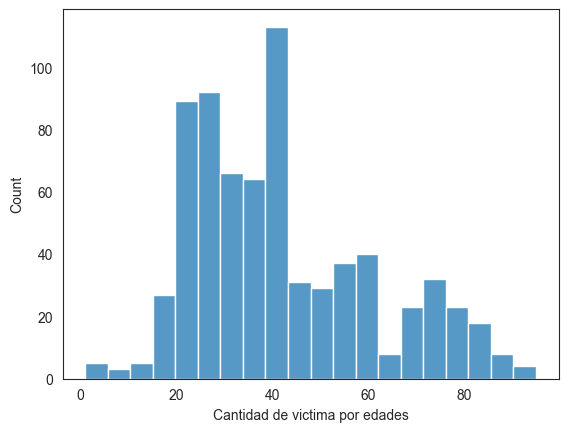

In [255]:
# Creamos un histograma para observar la distribucion de frecuencias de los valores en el conjunto de datos
g = sns.histplot(data = victimas, x = 'edad_victima', bins=20)
# Add labels
g.set_xlabel('Cantidad de victima por edades')

Podemos observar que la concentracion mas significativa la encontraremos en el punto mas alto del histograma, destacandose que las victimas estaban cerca de los 40 años. 

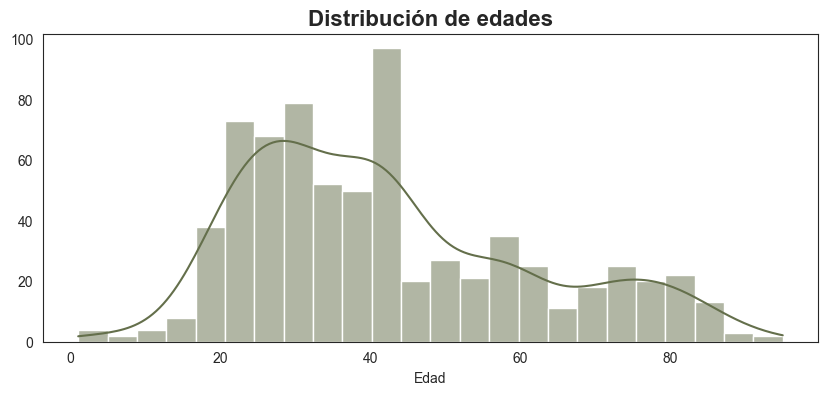

In [258]:
sns.set_style("white")
plt.figure(figsize=(10, 4))

sns.histplot(data=datos_edades, x='edad_victima', color='#646F4B', bins=24, kde= True)
plt.xlabel("Edad")
plt.ylabel("")
plt.title("Distribución de edades",fontweight="bold", fontsize=16)
plt.show()

### Se prepara un dataset desde el el modeleo de datos en PostgreSQL, para imprimir la siguoete gráfica

In [40]:
# Leemos el archivo preparado desde PostgreSQL 
ruta_archivo = r'../datasets./victimas_fecha.csv'
victimas_frecuencia = pd.read_csv(ruta_archivo, sep=';')

In [41]:
# Verificamos los datos
victimas_frecuencia.head(2)

,anio,mes,dia,count
0,2016,4,15,2
1,2016,3,29,1


Text(0.5, 1.0, 'Victimas por Año')

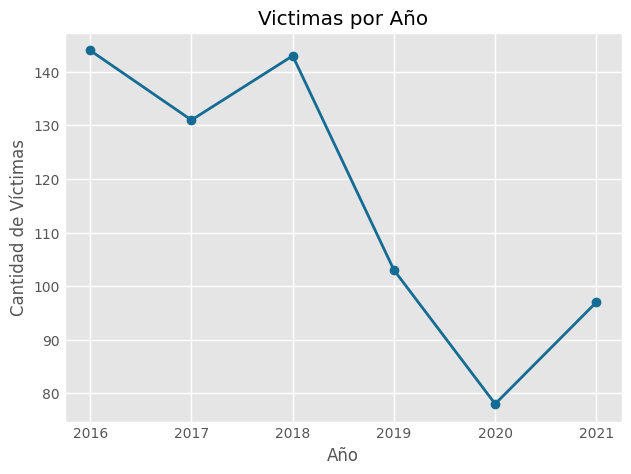

In [42]:
plt.style.use('ggplot')
victimas = victimas_frecuencia.groupby(["anio"])["count"].sum().plot(marker='o', linewidth= 2,color='#146C94')
plt.grid(visible=True)
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.title('Victimas por Año')                                                       
                                                                     

## Graficas Cualitativas

([<matplotlib.patches.Wedge at 0x2937295a360>,
 [Text(-0.742112136149208, -0.8119541719703517, 'Masculino'),
  Text(0.7421120981388892, 0.8119542067111272, 'Femenino')],
 [Text(-0.404788437899568, -0.44288409380200994, '76.4%'),
  Text(0.40478841716666686, 0.44288411275152384, '23.6%')])

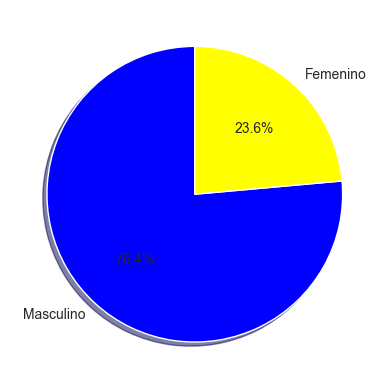

In [256]:
masculino = victimas["sexo_victima"].value_counts()["MASCULINO"]
femenino = victimas["sexo_victima"].value_counts()["FEMENINO"]
etiquetas = 'Masculino', 'Femenino'
sizes = [masculino, femenino]
fig, ax = plt.subplots()
ax.pie(sizes, labels=etiquetas, autopct='%1.1f%%',colors=['blue', 'yellow'],shadow=True, startangle=90)

La gráfica muestra una clara diferencia en las tasas de mortalidad por sexo. Obbservamos que el número de fallecimientos en hombres es significativamente mayor que en mujeres. Las causas de tal diferencia puediera deberse a factores  biológicos, sociales y conductuales.

<function matplotlib.pyplot.show(close=None, block=None)>

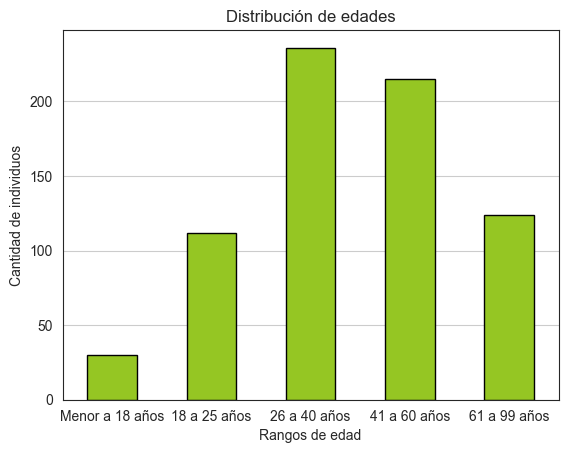

In [291]:
intervalos = [0, 18, 25, 40, 60, 99]
datos_edades = victimas[victimas["edad_victima"] != "SD"]
etiquetas = ["Menor a 18 años", "18 a 25 años", "26 a 40 años", "41 a 60 años", "61 a 99 años"]
edades_agrupadas = victimas.groupby(pd.cut(datos_edades['edad_victima'], intervalos, labels=False)).size()
edades_agrupadas.plot(kind='bar', color='#95C623', edgecolor='k')
plt.xlabel('Rangos de edad')
plt.ylabel('Cantidad de individuos')
plt.xticks(edades_agrupadas.index, etiquetas, rotation = 0)
plt.title('Distribución de edades')
plt.grid(axis='y')
plt.show

Se evidencia con esta gráfica y reforzando lo conocido que las edades de las victimas estaban cerca de los 40 años

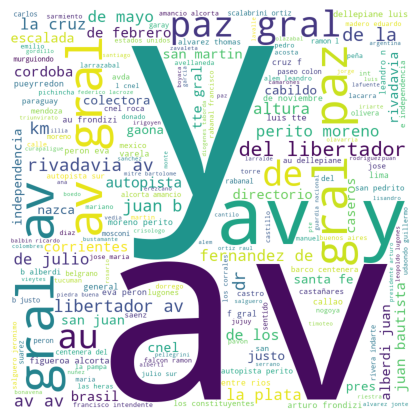

In [292]:
comment_words = ''
#stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in siniestros["lugar_hecho"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

En esta nube de palabras sugiere que la mayor cantidad de victimas se encuentra en los lugares que sobresalen (letras mas grandes)

In [302]:
def get_anio (fecha):
    fecha = datetime.strptime(fecha, "%Y-%m-%d")
    anio = fecha.year
    return anio

def get_mes (fecha):
    fecha = datetime.strptime(fecha, "%Y-%m-%d")
    mes = fecha.month
    return mes

def get_dia (fecha):
    fecha = datetime.strptime(fecha, "%Y-%m-%d")
    dia = fecha.day
    return dia


In [50]:
victimas_frecuencia.head(5)

,anio,mes,dia,count
0,2016,4,15,2
1,2016,3,29,1
2,2016,3,4,1
3,2016,9,14,1
4,2016,9,2,2


In [57]:
victimas_frecuencia[victimas_frecuencia['anio'] == 2016]

,anio,mes,dia,count
0,2016,4,15,2
1,2016,3,29,1
2,2016,3,4,1
3,2016,9,14,1
4,2016,9,2,2
...,...,...,...,...
113,2016,2,8,1
114,2016,7,17,1
115,2016,3,14,1
116,2016,9,17,1


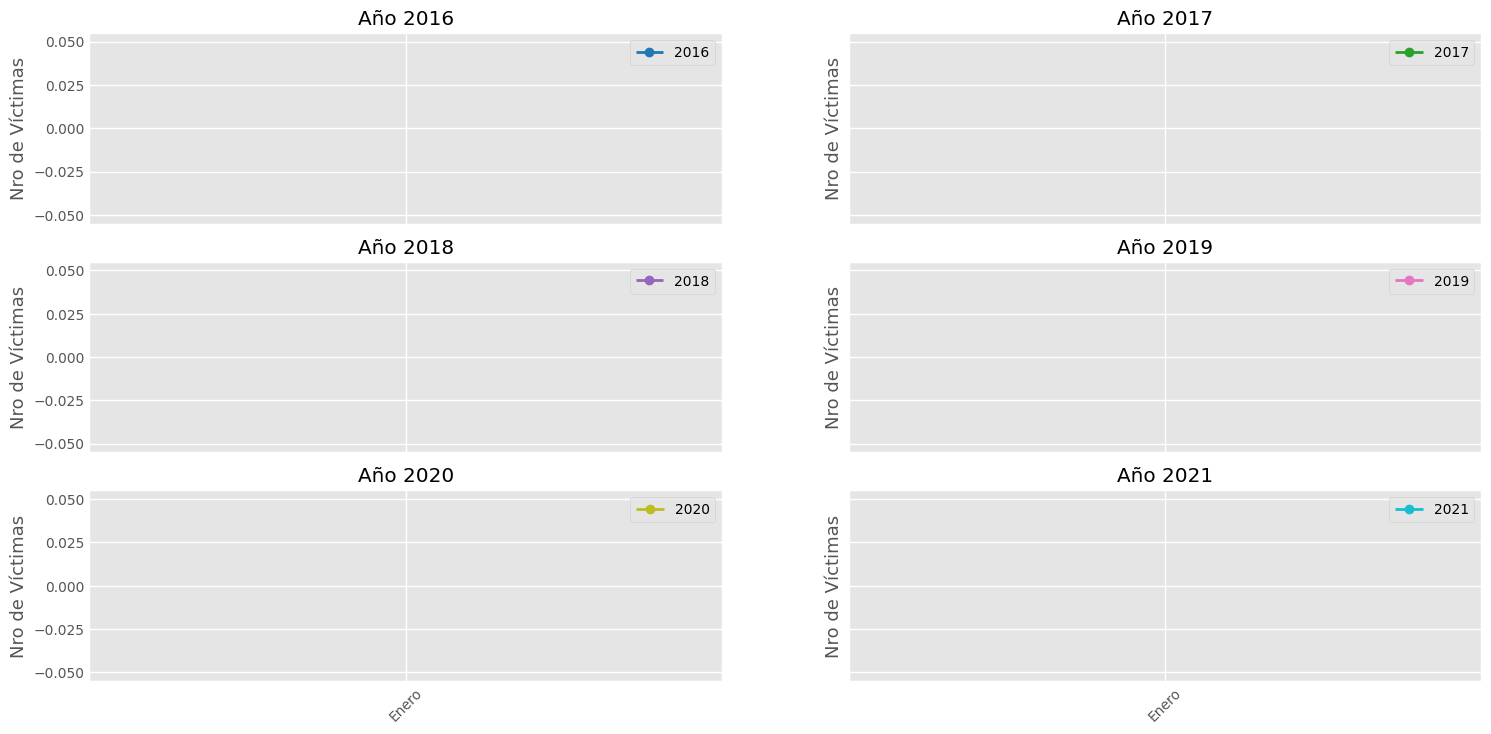

In [65]:
#cmap = plt.colormaps.get_cmap('gnuplot')
meses = [
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
    'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
]

anios = victimas_frecuencia['anio'].unique()

fig, axes = plt.subplots(3, 2, figsize=(16, 8), sharex=True, sharey=True)

colores = plt.get_cmap(name='tab10', lut = len(anios)) # Paleta de colores 

for indice, year in enumerate(anios):
    fila = indice // 2
    columna = indice % 2

    victimas_x_anio = victimas_frecuencia[victimas_frecuencia['anio'] == year]
    victimas_x_meses = victimas_x_anio.groupby('mes')['count'].sum().reindex(meses)
    
    ax = axes[fila, columna]
    color = colores(indice)
    ax.plot(victimas_x_meses.index, victimas_x_meses.values, marker='o', label=str(year), linewidth= 2, color=color)
    ax.set_title('Año ' + str(year))
    ax.set_xlabel('')
    ax.set_ylabel('Nro de Víctimas', fontsize=13)
    ax.legend()
    

for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=45)   
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))